In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
scoos = pd.read_csv("../data/SCOOS_Harmful_Algal_Blooms_1916-2019.csv", skiprows= 7, encoding="latin-1")

In [3]:
scoos.head()

,year,month,day,time,latitude,longitude,depth (m),location,Akashiwo sanguinea (cells/L),Alexandrium spp. (cells/L),...,Phaeophytin 1 (mg/m3),Phaeophytin 2 (mg/m3),Phosphate (uM),Prorocentrum spp. (cells/L),Pseudo-nitzschia delicatissima group (cells/L),Pseudo-nitzschia seriata group (cells/L),Silicate (uM),Volume Settled for counting (mL),Water Temperature (°C),Volume for counting (mL)
0,1969,12,31,23:59:59,33.606100,-117.931100,0.0,Newport Pier,0.0,0.0,...,NaN,NaN,0.310,5200.0,5200.0,15599.0,NaN,25.0,18.0,NaN
1,1969,12,31,23:59:59,34.408000,-119.685000,0.0,Stearns Wharf,0.0,0.0,...,0.58,NaN,1.102,2552.0,1392.0,0.0,6.562,50.0,NaN,NaN
2,1969,12,31,23:59:59,36.603686,-121.889271,0.0,Monterey Wharf,0.0,858.0,...,NaN,NaN,NaN,17503.0,1500.0,5574.0,NaN,NaN,NaN,NaN
3,1969,12,31,23:59:59,34.408000,-119.685000,0.0,Stearns Wharf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969,12,31,23:59:59,34.008000,-118.499000,0.0,Santa Monica Pier,748.0,0.0,...,NaN,NaN,NaN,2992.0,0.0,7480.0,NaN,NaN,16.8,NaN


0

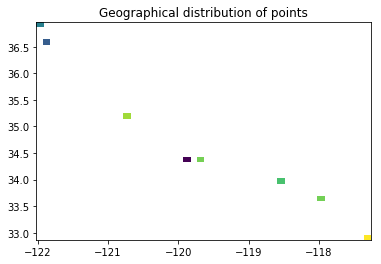

In [21]:
plt.hist2d(scoos.longitude, scoos.latitude, bins=50, cmin=1)
plt.title("Geographical distribution of points")
0

In [6]:
scoos["Date"] = pd.to_datetime(scoos.apply(lambda x: str(x.year)+"-"+str(x.month)+"-"+str(x.day), axis=1))

Text(0.5, 1.0, 'Distribution of SCOOS data points over time')

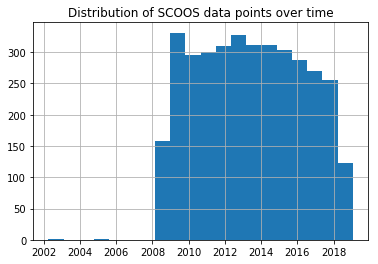

In [31]:
scoos[scoos.Date > pd.to_datetime("2002-01-01")].Date.hist(bins=20)
plt.title("Distribution of SCOOS data points over time")

In [25]:
# Unique dates:
scoos.groupby("Date").apply(lambda.unique().shape

(1596,)

In [14]:
scoos[scoos.Date > pd.to_datetime("2008-01-01")].Date.map(lambda x: x.year*100+x.month).value_counts().sort_index().head()

200806     4
200807    21
200808    23
200809    28
200810    29
Name: Date, dtype: int64

In [20]:

(pd.cut(scoos.latitude,100).astype(str) + pd.cut(scoos.longitude,100).astype(str)).value_counts()

(32.863, 32.908](-117.305, -117.257]    664
(35.158, 35.199](-120.779, -120.732]    587
(34.381, 34.422](-119.732, -119.685]    549
(33.603, 33.644](-117.971, -117.923]    547
(33.972, 34.012](-118.542, -118.495]    505
(36.917, 36.958](-122.022, -121.969]    354
(36.59, 36.631](-121.922, -121.874]     276
(34.381, 34.422](-119.875, -119.827]    117
dtype: int64

In [23]:
len(scoos.latitude.unique()), len(scoos.longitude.unique())

(8, 8)

In [25]:
(scoos.latitude.astype(str) + "," + scoos.longitude.astype(str)).unique()

array(['33.6061,-117.9311', '34.408,-119.685',
       '36.603685999999996,-121.889271', '34.008,-118.499',
       '36.958,-122.01700000000001', '34.4161076,-119.82874939999999',
       '32.867,-117.257', '35.17,-120.741'], dtype=object)